In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
%tensorflow_version 2.x

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/datasets/nn/digit recognizer/

/content/drive/MyDrive/datasets/nn/digit recognizer


### Import training dataset

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
# 'label' variable in train_df is response variable and rest all variable's are independent features

In [8]:
# There are exactly 784 independent features i.e we have input of 28px X 28px grayscale image

In [9]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [10]:
# Check for null values
df.columns[df.isnull().sum()>0]

Index([], dtype='object')

In [11]:
# Split df into independent features (X) and response variable (Y)
X = df.drop('label', axis=1)
Y = df['label']

In [12]:
### Points:
# 1.) Dataset is not normalized.
# 2.) 

In [13]:
# Split df in training datasetand validation dataset
from sklearn.model_selection import train_test_split

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 2021)

In [15]:
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((33600, 784), (8400, 784), (33600,), (8400,))

#### Plot any random image from dataset

In [16]:
import random

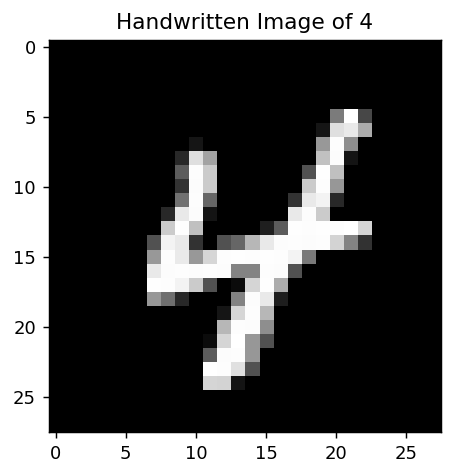

In [17]:
rand_index = random.randint(0,33600)
plt.figure(dpi=130)
plt.imshow(Xtrain.iloc[rand_index].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
plt.title(f'Handwritten Image of {Ytrain.iloc[rand_index]}')
plt.show()

### Model Training (Neural Network)

In [42]:
input_shape = (784,)
hidden_activation_fn = 'tanh'
initializer = tf.keras.initializers.HeNormal(seed = 2021)
output_activation_fn = 'softmax'
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer_fn = 'adam'
batch_size = 3072
epochs = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

In [43]:
# count of neuron in hidden layer = (neuron in previous layer  + neuron in next layer) / 2

In [44]:
## Create object of model
model = tf.keras.models.Sequential()

In [45]:
## Add Input Layer 
model.add(tf.keras.layers.Dense(input_shape[0], input_shape=input_shape))

In [46]:
## Add Hidden Layer 1
model.add(tf.keras.layers.Dense(397, activation=hidden_activation_fn, kernel_initializer=initializer))

In [47]:
## Batch Normalizing layer 1
model.add(tf.keras.layers.BatchNormalization())

In [48]:
## Dropout layer 1
model.add(tf.keras.layers.Dropout(.2))

In [49]:
## Add Hidden Layer 2
model.add(tf.keras.layers.Dense(397, activation=hidden_activation_fn, kernel_initializer=initializer))

In [50]:
## Batch Normalizing layer 2
model.add(tf.keras.layers.BatchNormalization())

In [51]:
## Dropout layer 2
model.add(tf.keras.layers.Dropout(.2))

In [52]:
## Add Hidden Layer 3
model.add(tf.keras.layers.Dense(204, activation=hidden_activation_fn, kernel_initializer=initializer))

In [53]:
## Batch Normalizing layer 3
model.add(tf.keras.layers.BatchNormalization())

In [54]:
## Dropout layer 3
model.add(tf.keras.layers.Dropout(.2))

In [55]:
## Add Hidden Layer 4
model.add(tf.keras.layers.Dense(107, activation=hidden_activation_fn, kernel_initializer=initializer))

In [56]:
## Batch Normalizing layer 4
model.add(tf.keras.layers.BatchNormalization())

In [57]:
## Dropout layer 4
model.add(tf.keras.layers.Dropout(.2))

In [58]:
## Add Hidden Layer 5
model.add(tf.keras.layers.Dense(59, activation=hidden_activation_fn, kernel_initializer=initializer))

In [59]:
## Batch Normalizing layer 5
model.add(tf.keras.layers.BatchNormalization())

In [60]:
## Dropout layer 5
model.add(tf.keras.layers.Dropout(.2))

In [61]:
## Add Hidden Layer 6
model.add(tf.keras.layers.Dense(35, activation=hidden_activation_fn, kernel_initializer=initializer))

In [62]:
## Add Output Layer
model.add(tf.keras.layers.Dense(10, activation=output_activation_fn))

In [63]:
# model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 397)               311645    
                                                                 
 batch_normalization_5 (Batc  (None, 397)              1588      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 397)               0         
                                                                 
 dense_10 (Dense)            (None, 397)               158006    
                                                                 
 batch_normalization_6 (Batc  (None, 397)              1588      
 hNormalization)                                      

In [64]:
# compile model i.e set optimizer, loss fn, metrics
model.compile(optimizer=optimizer_fn, loss=loss_fn, metrics=['accuracy'])

In [65]:
# train model
model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose='auto', callbacks=[callback])

Epoch 1/500
11/11 [==============================] - 6s 415ms/step - loss: 1.8531 - accuracy: 0.3708
Epoch 2/500
11/11 [==============================] - 5s 413ms/step - loss: 1.2142 - accuracy: 0.6220
Epoch 3/500
11/11 [==============================] - 5s 412ms/step - loss: 0.9152 - accuracy: 0.7326
Epoch 4/500
11/11 [==============================] - 5s 416ms/step - loss: 0.7550 - accuracy: 0.7855
Epoch 5/500
11/11 [==============================] - 5s 413ms/step - loss: 0.6778 - accuracy: 0.8047
Epoch 6/500
11/11 [==============================] - 5s 414ms/step - loss: 0.6309 - accuracy: 0.8161
Epoch 7/500
11/11 [==============================] - 5s 413ms/step - loss: 0.5971 - accuracy: 0.8213
Epoch 8/500
11/11 [==============================] - 5s 415ms/step - loss: 0.5671 - accuracy: 0.8324
Epoch 9/500
11/11 [==============================] - 4s 408ms/step - loss: 0.5276 - accuracy: 0.8424
Epoch 10/500
11/11 [==============================] - 5s 411ms/step - loss: 0.5258 - accura

In [66]:
# import test dataset 
test_df = pd.read_csv('test.csv')

In [ ]:
test_df.head()

In [68]:
# predictions for testing dataset
predict = model.predict(test_df)

In [72]:
# custom functions to convert probabilities to labels
def predictions_to_labels(predictions):
  labels = []
  for prediction in predictions:
    labels.append(prediction.argmax())
  return np.array(labels)

In [73]:
predicted_labels = predictions_to_labels(predict)

In [74]:
# dict of imageid and labels
results_dict = {
    'ImageId' : np.arange(1,28001,1),
    'Label' : predicted_labels
}

In [76]:
# converting dict of results to dataframe
result_df = pd.DataFrame(results_dict)

In [77]:
# exporting dataframe to csv
result_df.to_csv('predictions-mnist.csv', index=False)